plotting

In [4]:
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np
# Load the results into a pandas dataframe
results = pd.read_csv("results.txt", sep=" ", header=None)

# print(results)
# Extract the prediction column
predictions = results[1]

print(predictions)
# # Create a plot of the predictions over epochs
# plt.plot(predictions)

# # Add labels and title to the plot
# plt.xlabel('Epochs')
# plt.ylabel('Prediction Accuracy')
# plt.title('Prediction Accuracy over Epochs')

# # Save the plot as a PNG file
# plt.savefig("prediction_plot.png", dpi=300)

# # Show the plot
# plt.show()

ParserError: Error tokenizing data. C error: Expected 64 fields in line 2, saw 65


In [25]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd  

def plot_results(start=0, stop=0, bucket='', id=(), labels=(), save_dir=''):
    # Plot training 'results*.txt'. from utils.plots import *; plot_results(save_dir='runs/train/exp')
    s = ['Box', 'Objectness', 'Classification', 'Precision', 'Recall',
         'val Box', 'val Objectness', 'val Classification', 'mAP@0.5', 'mAP@0.5:0.95']
    if bucket:
        # files = ['https://storage.googleapis.com/%s/results%g.txt' % (bucket, x) for x in id]
        files = ['results%g.txt' % x for x in id]
        c = ('gsutil cp ' + '%s ' * len(files) + '.') % tuple('gs://%s/results%g.txt' % (bucket, x) for x in id)
        os.system(c)
    else:
        files = list(Path(save_dir).glob('results*.txt'))
    assert len(files), 'No results.txt files found in %s, nothing to plot.' % os.path.abspath(save_dir)
    for fi, f in enumerate(files):
        try:
            results = np.loadtxt(f, usecols=[2, 3, 4, 8, 9, 12, 13, 14, 10, 11], ndmin=2).T
            n = results.shape[1]  # number of rows
            x = range(start, min(stop, n) if stop else n)
            fig, ax = plt.subplots(2, 5, figsize=(12, 6), tight_layout=True)
            ax = ax.ravel()
            for i in range(10):
                y = results[i, x]
                if i in [0, 1, 2, 5, 6, 7]:
                    y[y == 0] = np.nan  # don't show zero loss values
                    # y /= y[0]  # normalize|
                label = labels[fi] if len(labels) else f.stem
                ax[i].plot(x, y, marker='.', label=label, linewidth=2, markersize=8)
                ax[i].set_title(s[i])
                # if i in [5, 6, 7]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
                np.savetxt(Path(save_dir) / 'results_index_{}_{}.txt'.format(fi, i), y, delimiter=',')
        except Exception as e:
            print('Warning: Plotting error for %s; %s' % (f, e))


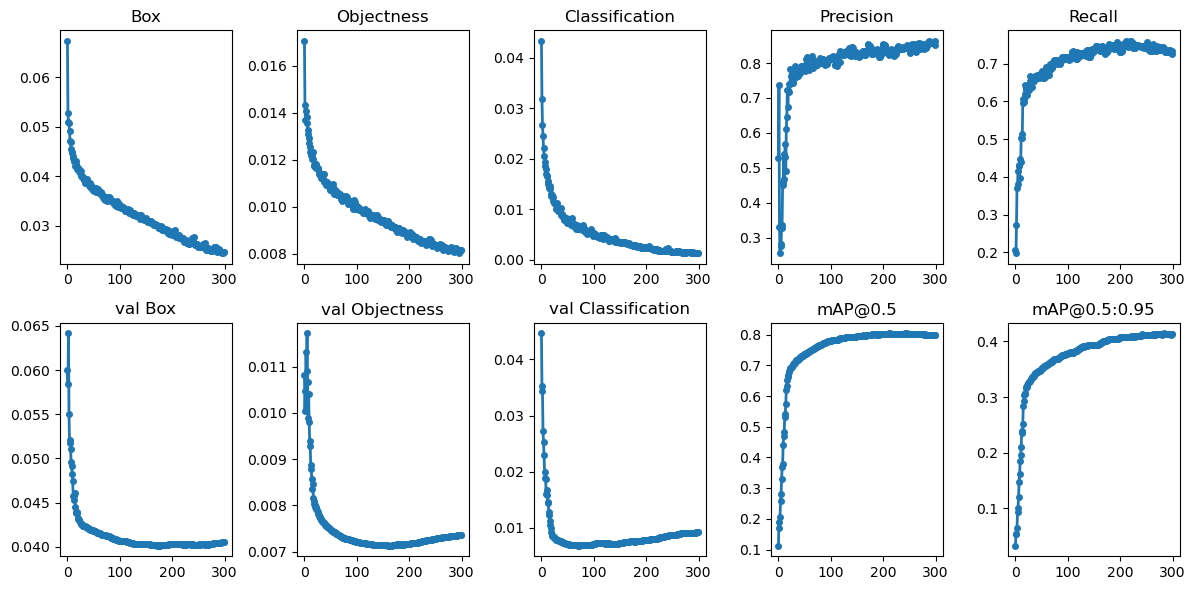

In [26]:
plot_results(save_dir='./')

In [40]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd  

def plot_results(start=0, stop=0, bucket='', id=(), labels=(), save_dir=''):
    # Plot training 'results*.txt'. from utils.plots import *; plot_results(save_dir='runs/train/exp')
    s = ['Box', 'Objectness', 'Classification', 'Precision', 'Recall',
         'val Box', 'val Objectness', 'val Classification', 'mAP@0.5', 'mAP@0.5:0.95']
    if bucket:
        # files = ['https://storage.googleapis.com/%s/results%g.txt' % (bucket, x) for x in id]
        files = ['results%g.txt' % x for x in id]
        c = ('gsutil cp ' + '%s ' * len(files) + '.') % tuple('gs://%s/results%g.txt' % (bucket, x) for x in id)
        os.system(c)
    else:
        files = list(Path(save_dir).glob('results*.txt'))
    assert len(files), 'No results.txt files found in %s, nothing to plot.' % os.path.abspath(save_dir)
    for fi, f in enumerate(files):
        try:
            results = np.loadtxt(f, usecols=[2, 3, 4, 8, 9, 12, 13, 14, 10, 11], ndmin=2).T
            n = results.shape[1]  # number of rows
            x = range(start, min(stop, n) if stop else n)
            for i in range(10):
                y = results[i, x]
                if i in [0, 1, 2, 5, 6, 7]:
                    y[y == 0] = np.nan  # don't show zero loss values
                    # y /= y[0]  # normalize
                label = labels[fi] if len(labels) else f.stem
                fig, ax = plt.subplots(figsize=(12, 6), tight_layout=True)
                ax.plot(x, y, marker='.', label=label, linewidth=2, markersize=8)
                ax.set_title(s[i])
                ax.set_xticks(np.arange(0, n+1, 25))  # display x-axis values in increments of 25
                fig.savefig(Path(save_dir) / (f.stem + '_' + s[i] + '.png'), dpi=200)
        except Exception as e:
            print('Warning: Plotting error for %s; %s' % (f, e))



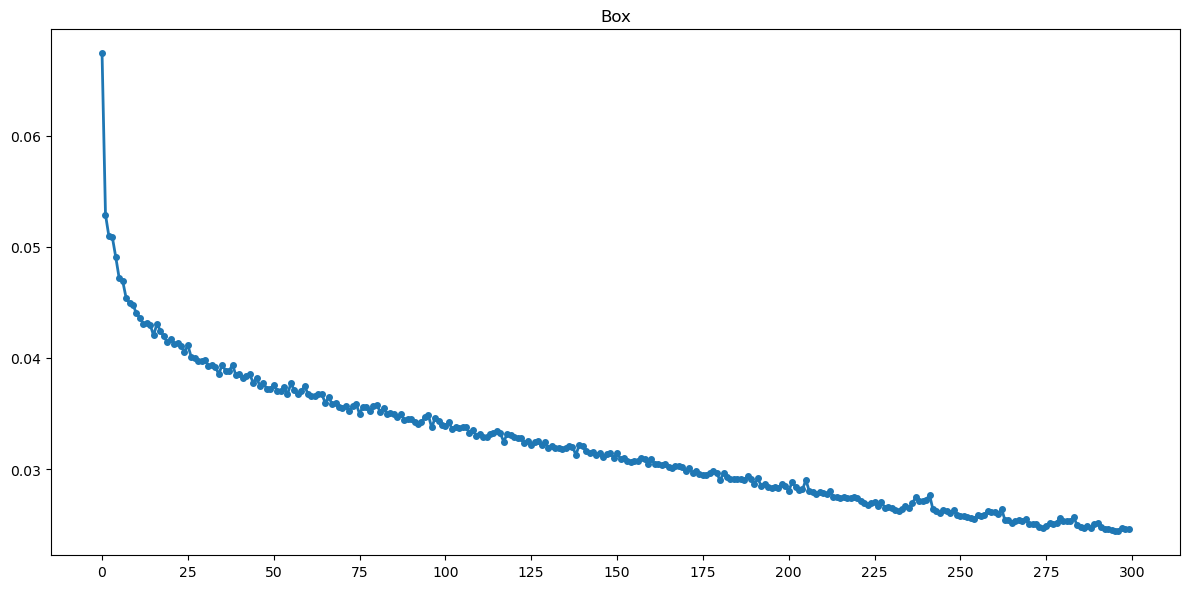

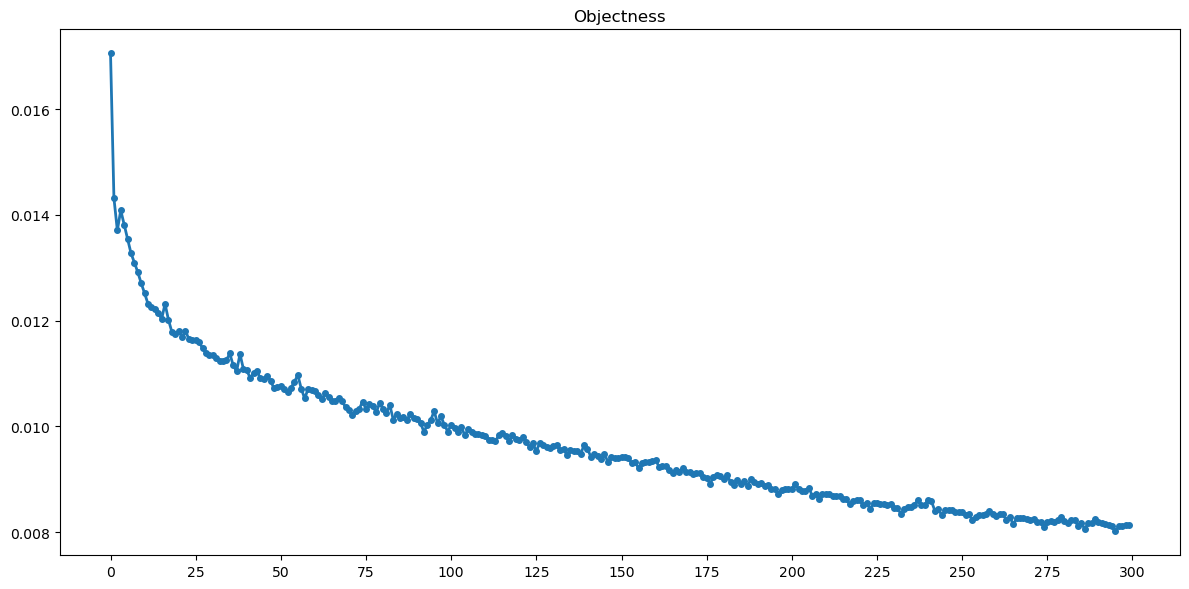

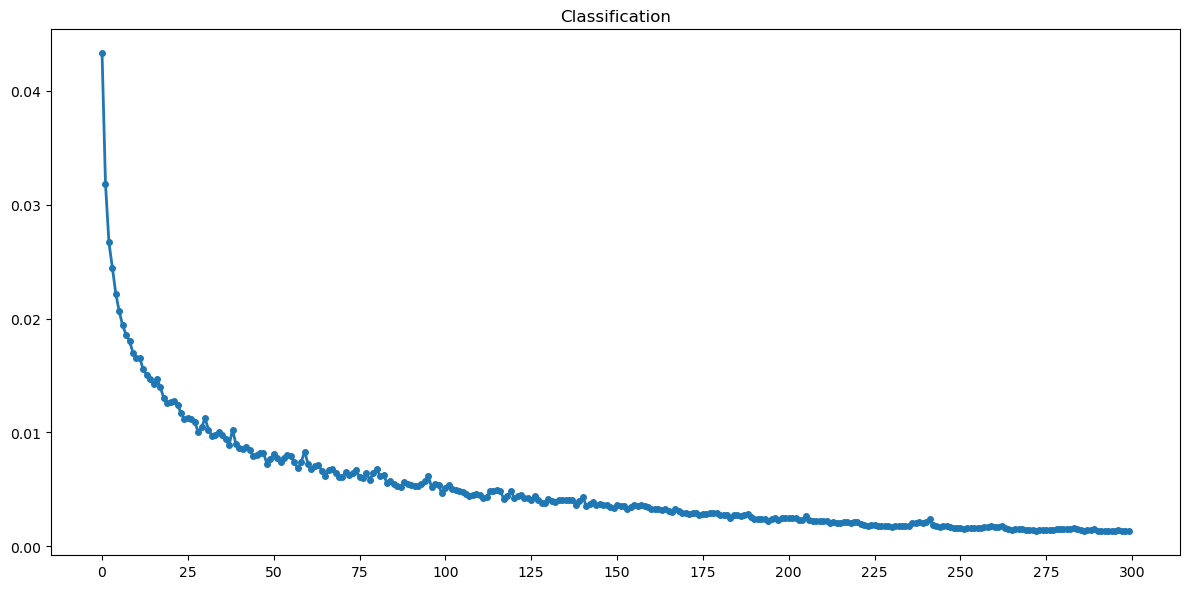

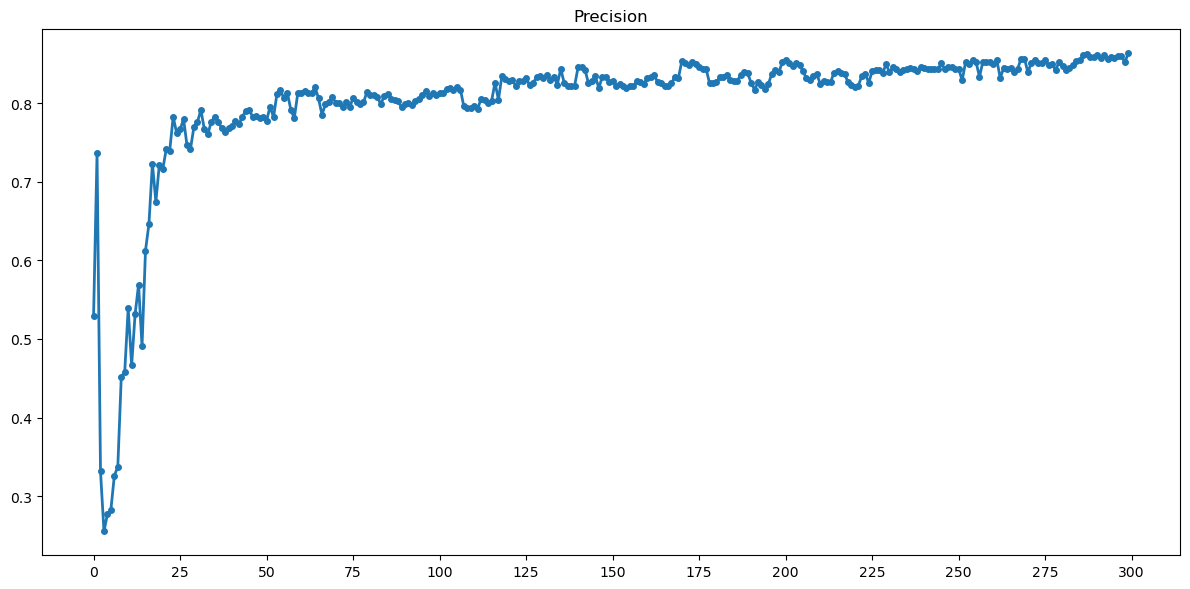

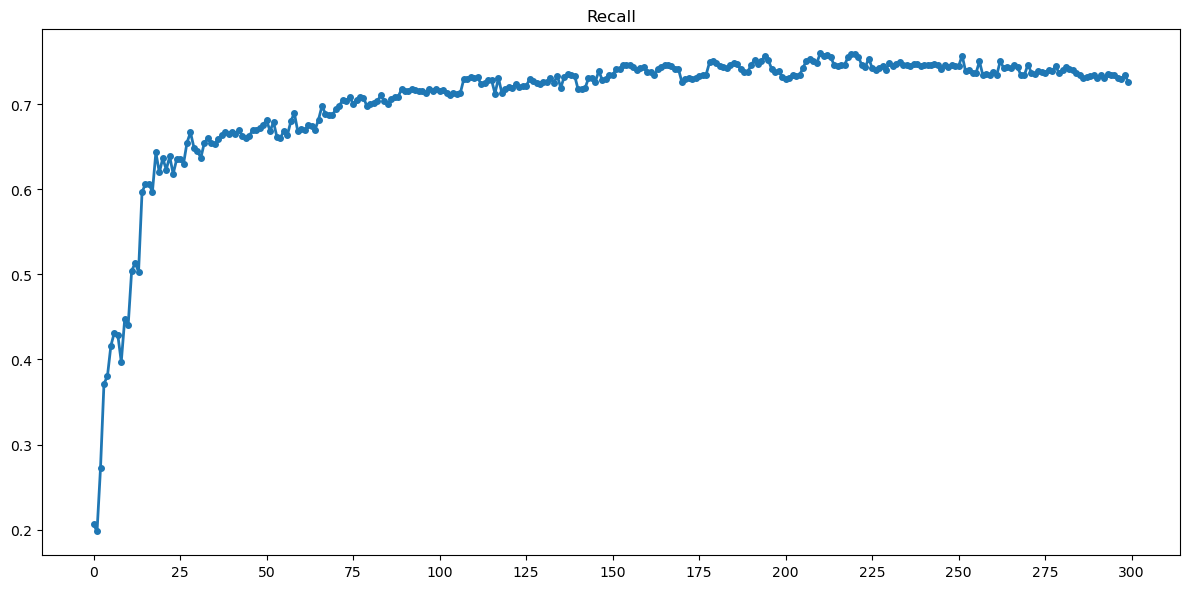

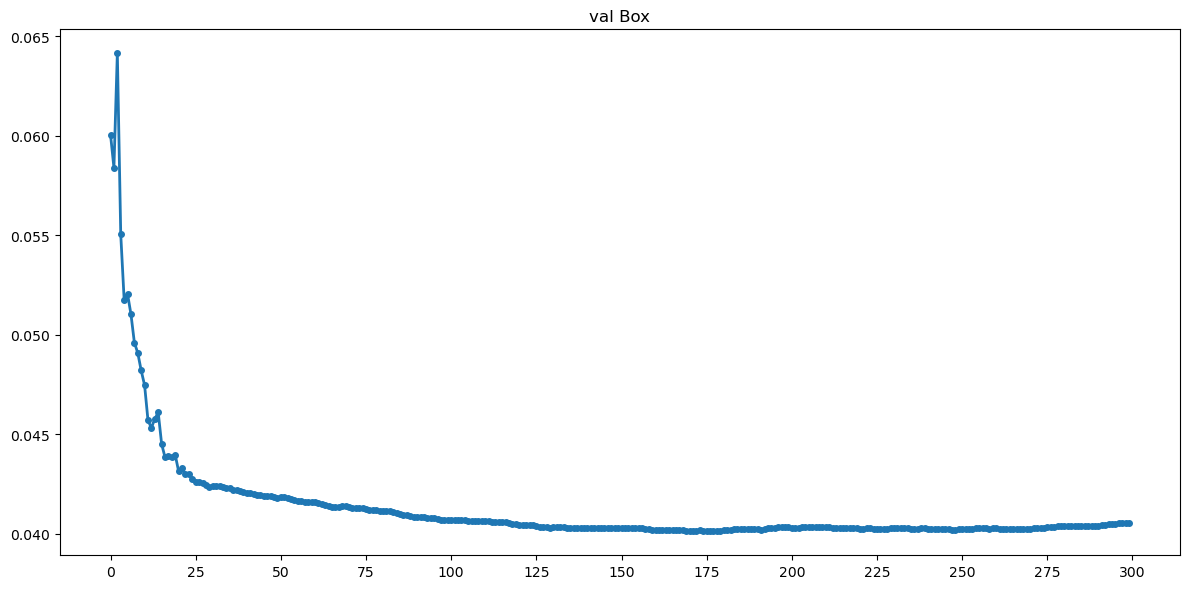

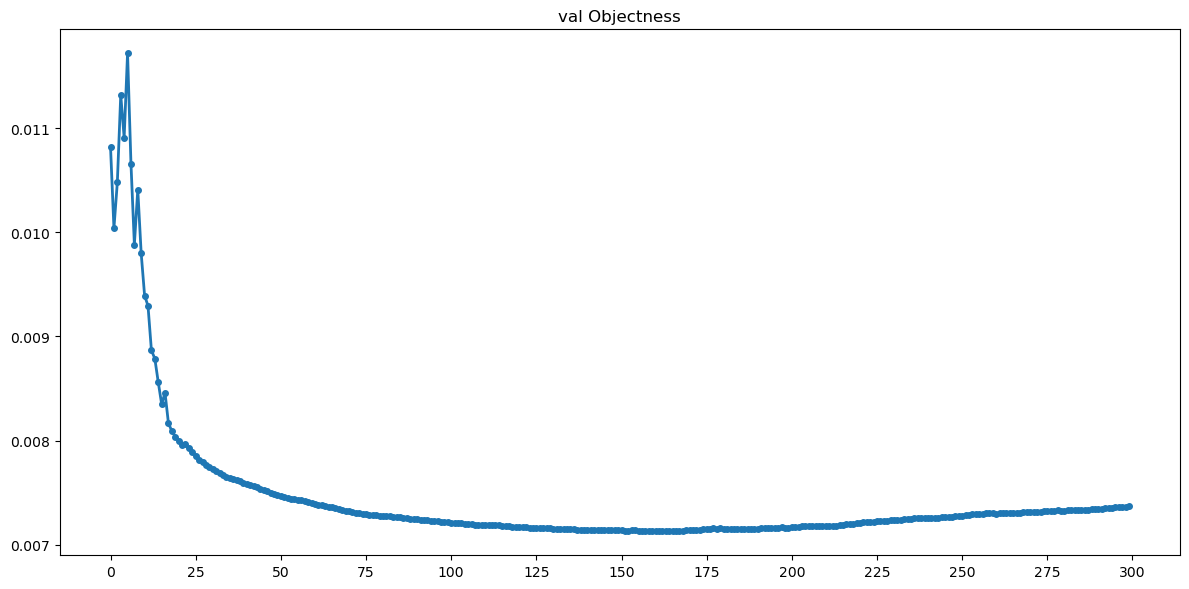

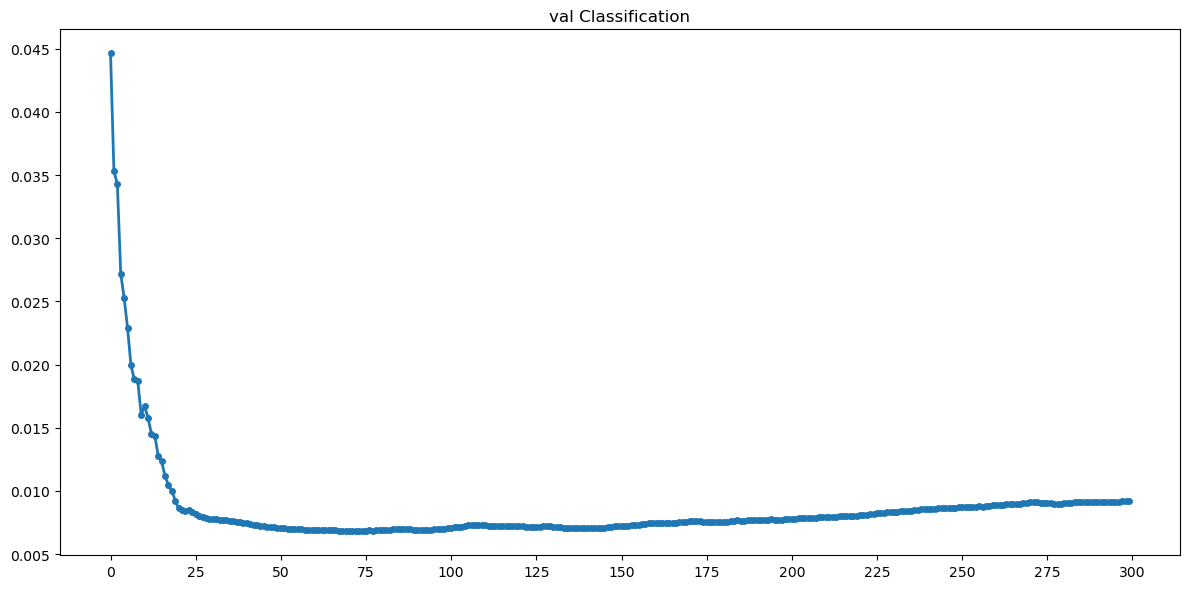

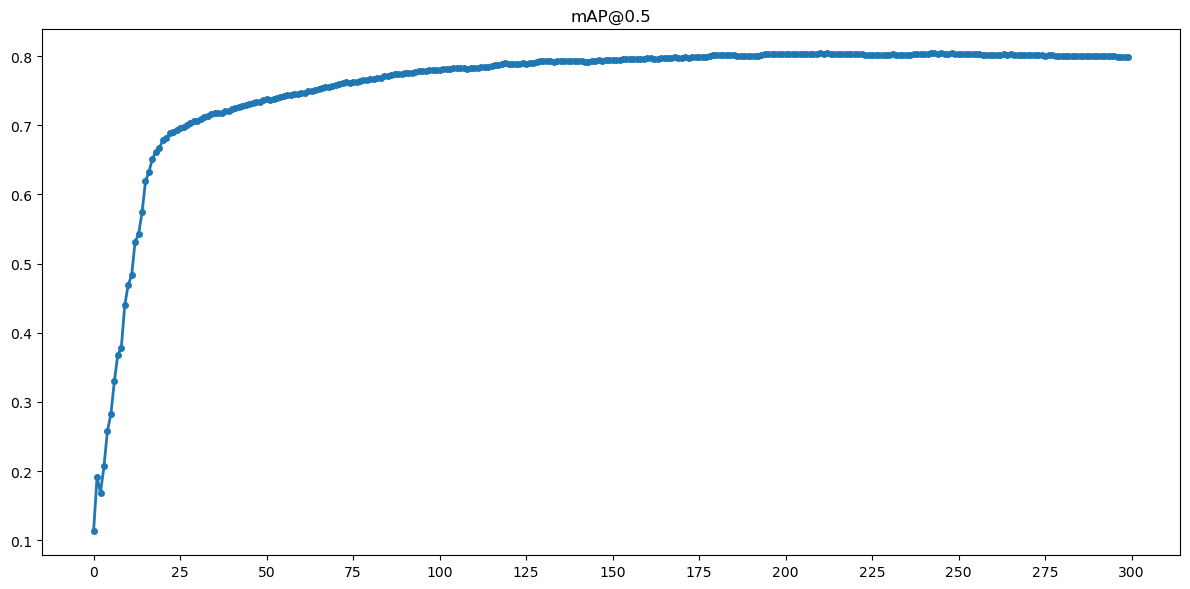

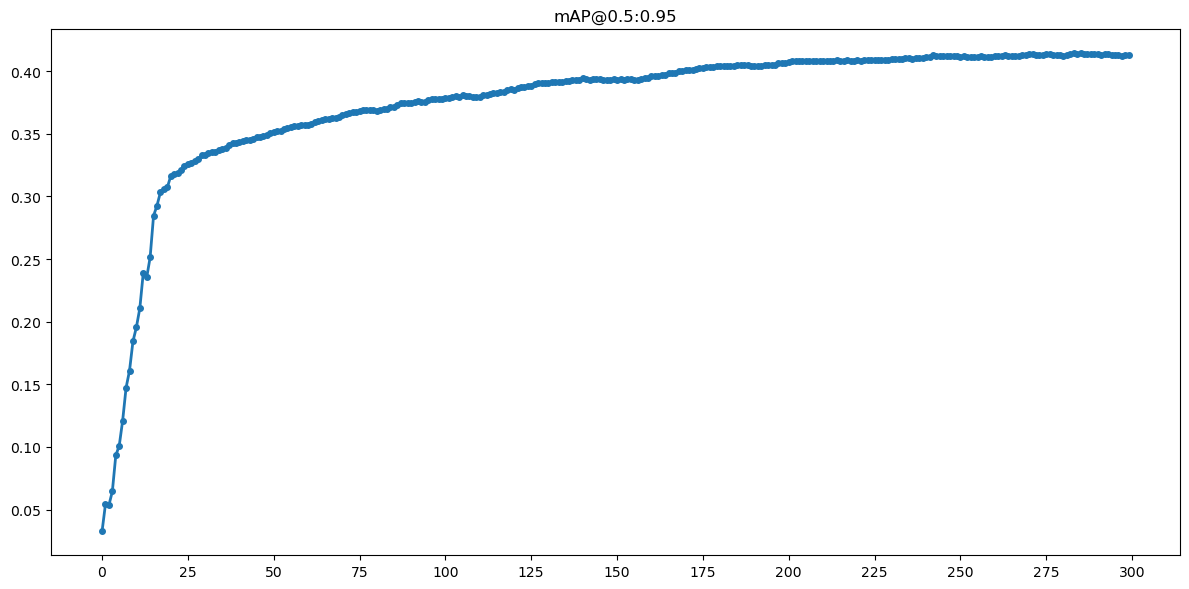

In [41]:
plot_results(save_dir='./')   